# Regression model for the prediction of car prices 

Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

Business Goal 

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [405]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [406]:
#Reading data into car dataframe
car=pd.read_csv('CarPrice_Assignment.csv')

In [407]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [408]:
#Extracting only the car company as specified
car['CarName']=car['CarName'].str.split(' ').str[0]
# Get the dummy variables for the feature 'carname' and store it in a new variable - 'status'
status = pd.get_dummies(car['CarName'])

car = pd.concat([car, status], axis = 1)
car.head()
#Data Cleaning
car['drivewheel']=car['drivewheel'].str.replace('4','f')

In [409]:
#Mapping all categorical variables with dual values
fueltype_bin={'gas':1,
             'diesel':0}
car['fueltype']=car['fueltype'].map(fueltype_bin)

aspiration_bin={'std':1,
             'turbo':0}
car['aspiration']=car['aspiration'].map(aspiration_bin)

doornumber_bin={'four':4,
             'two':2}
car['doornumber']=car['doornumber'].map(doornumber_bin)

drivewheel_bin={'fwd':1,
             'rwd':0}
car['drivewheel']=car['drivewheel'].map(drivewheel_bin)

enginelocation_bin={'front':1,
             'rear':0}
car['enginelocation']=car['enginelocation'].map(enginelocation_bin)

In [410]:
#Transforming all categorical data with more than dual values using LabelEncoder
le = LabelEncoder()

le.fit(car.carbody.drop_duplicates()) 
car.carbody=le.transform(car.carbody)

le.fit(car.enginetype.drop_duplicates()) 
car.enginetype=le.transform(car.enginetype)

le.fit(car.cylindernumber.drop_duplicates()) 
car.cylindernumber=le.transform(car.cylindernumber)

le.fit(car.fuelsystem.drop_duplicates()) 
car.fuelsystem=le.transform(car.fuelsystem)

le.fit(car.CarName.drop_duplicates())
car.CarName=le.transform(car.CarName)

In [411]:
#To see if there any missing values
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 54 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null int32
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null int32
drivewheel          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null int32
cylindernumber      205 non-null int32
enginesize          205 non-null int64
fuelsystem          205 non-null int32
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205

In [412]:
#Splitting the dataset into training and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [413]:
#Scaling the data using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [414]:
# Apply scaler() to all the columns except the dual-value variables and 'dummy' variables
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

c:\python27\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\python27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [415]:
#Storing the target and independent variables seperately
y_train = df_train.pop('price')
X_train = df_train

In [416]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [417]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [418]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 28),
 ('symboling', False, 26),
 ('CarName', False, 27),
 ('fueltype', True, 1),
 ('aspiration', False, 17),
 ('doornumber', False, 25),
 ('carbody', False, 30),
 ('drivewheel', False, 31),
 ('enginelocation', True, 1),
 ('wheelbase', False, 7),
 ('carlength', False, 2),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginetype', False, 29),
 ('cylindernumber', False, 21),
 ('enginesize', True, 1),
 ('fuelsystem', False, 24),
 ('boreratio', True, 1),
 ('stroke', False, 8),
 ('compressionratio', True, 1),
 ('horsepower', False, 15),
 ('peakrpm', True, 1),
 ('citympg', False, 4),
 ('highwaympg', False, 18),
 ('Nissan', False, 14),
 ('alfa-romero', True, 1),
 ('audi', False, 19),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 16),
 ('dodge', True, 1),
 ('honda', False, 3),
 ('isuzu', False, 22),
 ('jaguar', True, 1),
 ('maxda', False, 5),
 ('mazda', False, 23),
 ('mercury', False, 32),
 ('mitsubishi', True, 1),
 ('nissan', F

In [419]:
#Selecting all the cols with rfe support
col = X_train.columns[rfe.support_]
col

Index([u'fueltype', u'enginelocation', u'carwidth', u'carheight',
       u'curbweight', u'enginesize', u'boreratio', u'compressionratio',
       u'peakrpm', u'alfa-romero', u'bmw', u'buick', u'dodge', u'jaguar',
       u'mitsubishi', u'plymouth', u'porsche', u'renault', u'saab', u'volvo'],
      dtype='object')

In [420]:
X_train.columns[~rfe.support_]

Index([u'car_ID', u'symboling', u'CarName', u'aspiration', u'doornumber',
       u'carbody', u'drivewheel', u'wheelbase', u'carlength', u'enginetype',
       u'cylindernumber', u'fuelsystem', u'stroke', u'horsepower', u'citympg',
       u'highwaympg', u'Nissan', u'audi', u'chevrolet', u'honda', u'isuzu',
       u'maxda', u'mazda', u'mercury', u'nissan', u'peugeot', u'porcshce',
       u'subaru', u'toyota', u'toyouta', u'vokswagen', u'volkswagen', u'vw'],
      dtype='object')

In [421]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [422]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [423]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [424]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     116.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.35e-69
Time:                        18:58:52   Log-Likelihood:                 231.48
No. Observations:                 143   AIC:                            -421.0
Df Residuals:                     122   BIC:                            -358.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7285      0.155  

In [425]:
#drop alfa-romero due to high p-value
X_train_new = X_train_rfe.drop(["alfa-romero"], axis = 1)

In [426]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-2
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     120.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.20e-70
Time:                        18:58:52   Log-Likelihood:                 229.55
No. Observations:                 143   AIC:                            -419.1
Df Residuals:                     123   BIC:                            -359.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7441      0.157  

In [427]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [428]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-2
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     120.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.20e-70
Time:                        18:58:52   Log-Likelihood:                 229.55
No. Observations:                 143   AIC:                            -419.1
Df Residuals:                     123   BIC:                            -359.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7441      0.157  

In [429]:
# # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginelocation,215.519357
0,fueltype,157.872801
4,curbweight,48.070688
2,carwidth,39.705640
5,enginesize,28.716797
7,compressionratio,21.358681
6,boreratio,15.788118
3,carheight,12.470615
8,peakrpm,10.243766
15,porsche,2.210051


In [430]:
#Drop engine-locationvariable due to high VIF
X_train_new = X_train_new.drop(["enginelocation"], axis = 1)

In [431]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-3
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     105.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.03e-66
Time:                        18:58:53   Log-Likelihood:                 216.51
No. Observations:                 143   AIC:                            -395.0
Df Residuals:                     124   BIC:                            -338.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4585      0.159  

In [432]:
# # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,47.621720
1,carwidth,36.224740
0,fueltype,28.777060
4,enginesize,27.025604
5,boreratio,15.639624
2,carheight,12.469145
7,peakrpm,10.093755
6,compressionratio,4.441473
11,jaguar,2.073949
9,buick,1.644167


In [433]:
#Drop curbweight due to high VIF
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [434]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-4
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     92.63
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.80e-62
Time:                        18:58:53   Log-Likelihood:                 203.56
No. Observations:                 143   AIC:                            -371.1
Df Residuals:                     125   BIC:                            -317.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6617      0.167  

In [435]:
# # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,25.773470
0,fueltype,24.772793
3,enginesize,17.215960
4,boreratio,14.009938
2,carheight,11.049449
6,peakrpm,9.816253
5,compressionratio,4.155244
10,jaguar,2.073354
8,buick,1.642605
13,porsche,1.412672


In [436]:
#Drop boreratio due to high VIF and p-value
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

In [437]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-5
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     96.70
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.21e-62
Time:                        18:58:53   Log-Likelihood:                 201.86
No. Observations:                 143   AIC:                            -369.7
Df Residuals:                     126   BIC:                            -319.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5606      0.158  

In [438]:
# # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,23.217832
0,fueltype,20.086714
3,enginesize,16.986096
2,carheight,11.032834
5,peakrpm,8.967194
4,compressionratio,3.758822
9,jaguar,2.059445
7,buick,1.626421
6,bmw,1.326682
12,porsche,1.294944


In [439]:
#Drop carwidth due to high VIF 
X_train_new = X_train_new.drop(["carwidth"], axis = 1)

In [440]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-6
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     78.90
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.09e-57
Time:                        18:58:53   Log-Likelihood:                 183.83
No. Observations:                 143   AIC:                            -335.7
Df Residuals:                     127   BIC:                            -288.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8157      0.172  

In [441]:
# # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,19.971342
1,carheight,10.133520
2,enginesize,9.101506
4,peakrpm,8.450905
3,compressionratio,3.571490
8,jaguar,1.987169
6,buick,1.598984
11,porsche,1.294827
5,bmw,1.291809
9,mitsubishi,1.206034


In [442]:
#Drop carheigth due to high VIF and p-value 
X_train_new = X_train_new.drop(["carheight"], axis = 1)

In [443]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-7
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     82.54
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.92e-57
Time:                        18:58:53   Log-Likelihood:                 181.78
No. Observations:                 143   AIC:                            -333.6
Df Residuals:                     128   BIC:                            -289.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6707      0.156  

In [444]:
# # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,11.986292
1,enginesize,9.093561
3,peakrpm,8.125708
2,compressionratio,1.996894
7,jaguar,1.923555
5,buick,1.589740
4,bmw,1.284146
10,porsche,1.249897
13,volvo,1.152956
8,mitsubishi,1.116637


In [445]:
#Drop fueltype due to high VIF and p-value 
X_train_new = X_train_new.drop(["fueltype"], axis = 1)

In [446]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-8
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     72.80
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.05e-53
Time:                        18:58:54   Log-Likelihood:                 168.58
No. Observations:                 143   AIC:                            -309.2
Df Residuals:                     129   BIC:                            -267.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1157      0.028  

In [447]:
# # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,5.623460
2,peakrpm,2.990257
6,jaguar,1.742122
1,compressionratio,1.724057
4,buick,1.476435
3,bmw,1.277385
9,porsche,1.136690
12,volvo,1.119167
7,mitsubishi,1.116627
5,dodge,1.112800


In [448]:
#Drop dodge due to high p-value 
X_train_new = X_train_new.drop(["dodge"], axis = 1)

In [449]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-9
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     77.89
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.76e-53
Time:                        18:58:54   Log-Likelihood:                 167.31
No. Observations:                 143   AIC:                            -308.6
Df Residuals:                     130   BIC:                            -270.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1184      0.028  

In [450]:
# # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,5.539416
2,peakrpm,2.733106
5,jaguar,1.736828
1,compressionratio,1.722287
4,buick,1.473352
3,bmw,1.277252
8,porsche,1.134970
11,volvo,1.116857
6,mitsubishi,1.110298
7,plymouth,1.066644


In [451]:
#Drop plymouth due to high p-value 
X_train_new = X_train_new.drop(["plymouth"], axis = 1)

In [452]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-10
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     84.71
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.37e-54
Time:                        18:58:54   Log-Likelihood:                 166.63
No. Observations:                 143   AIC:                            -309.3
Df Residuals:                     131   BIC:                            -273.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1196      0.028  

In [453]:
# # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,5.496138
2,peakrpm,2.593831
5,jaguar,1.734231
1,compressionratio,1.720971
4,buick,1.471975
3,bmw,1.277208
7,porsche,1.133934
10,volvo,1.115447
6,mitsubishi,1.106719
9,saab,1.036065


In [454]:
#Drop jaguar due to high p-value 
X_train_new = X_train_new.drop(["jaguar"], axis = 1)

In [455]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-11
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     92.46
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.30e-54
Time:                        18:58:54   Log-Likelihood:                 165.67
No. Observations:                 143   AIC:                            -309.3
Df Residuals:                     132   BIC:                            -276.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1323      0.026  

In [456]:
# # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,3.207569
2,peakrpm,2.225381
1,compressionratio,1.614483
4,buick,1.329355
3,bmw,1.163780
5,mitsubishi,1.095081
6,porsche,1.094269
9,volvo,1.090695
8,saab,1.032874
7,renault,1.021492


In [457]:
#Drop renault due to high p-value 
X_train_new = X_train_new.drop(["renault"], axis = 1)

In [458]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model-12
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.34e-55
Time:                        18:58:54   Log-Likelihood:                 164.31
No. Observations:                 143   AIC:                            -308.6
Df Residuals:                     133   BIC:                            -279.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1341      0.026  

In [459]:
# # Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,3.182420
2,peakrpm,2.222808
1,compressionratio,1.613157
4,buick,1.327252
3,bmw,1.161171
5,mitsubishi,1.093413
6,porsche,1.092290
8,volvo,1.089090
7,saab,1.032311


In [460]:
y_train_price = lm.predict(X_train_lm)

Text(0.5,0,'Errors')

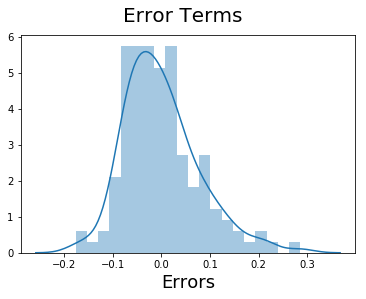

In [461]:
# Plot the histogram of the error terms to see if they are normally distributed
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [462]:
# Apply scaler() to all the columns except the dual-value variable and 'dummy' variables for test dataset
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

c:\python27\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\python27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [463]:
#Stoing the target and independent variables seperately
y_test = df_test.pop('price')
X_test = df_test

In [464]:
# Creating X_test_m4 dataframe by dropping variables from X_test

X_test_m4 = X_test[col]

In [465]:
#dropping variable as per analysis done above for p-value and VIF
X_test_m4=X_test_m4.drop(["alfa-romero","enginelocation","boreratio","curbweight","carwidth","fueltype","carheight","dodge","plymouth","jaguar","renault"],axis=1)

In [466]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test_m4)

In [467]:
y_pred=lm.predict(X_test_m4)

In [468]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8367604379189517